-------------------------------
#### Concepts on PDF/ CDF and PPF
- normal distribution
---------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as spi

D:\Anaconda-16-FEB\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Example 1: Definite Integral of a Simple Function

In [2]:
# Define a simple function to integrate
def f(x):
    return x**2

In [3]:
# for the area under a specific range
start_a = 2
end_b   = 3

In [4]:
# for function plot, X range
start_x = -3
end_x   = 5

In [5]:
# Compute the definite integral of the function in a given range
result, _ = spi.quad(f, start_a, end_b)
print(f"The result of the integration is: {result}")

The result of the integration is: 6.333333333333334


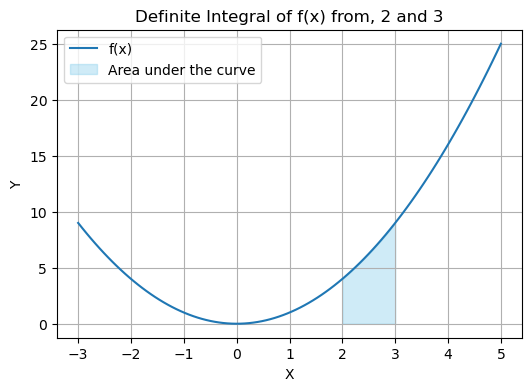

In [6]:
# Plot the function and the area under the curve
x_range  = np.linspace(start_x, end_x, 100)
y_range  = f(x_range)

x_values = np.linspace(start_a, end_b, 100)
y_values = f(x_values)

plt.figure(figsize=(6, 4))
plt.plot(x_range, y_range, label='f(x)')
plt.fill_between(x_values, y_values, color='skyblue', alpha=0.4, label='Area under the curve')

plt.title('Definite Integral of f(x) from, {} and {}'.format( start_a, end_b))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend();

Area under the curve between the points [startr_a, end_b] 

#### Example 2: PDF Calculation
Given the probability density function (PDF) for a continuous random variable X:
$$
f(x)=\frac{1}{4} x^2, \quad \text { for } 0 \leq x \leq 2
$$

Calculate the probability that $X$ lies between 1 and 2 .

In [7]:
# PDF function
def pdf_function(x):
    return 1/4 * x**2

In [8]:
# Probability range
x_range           = np.linspace(0, 2,   1000)
probability_range = np.linspace(1, 1.2, 1000)

# Mean of x_range
x_range_mean = np.mean(x_range)
x_range_mean

1.0

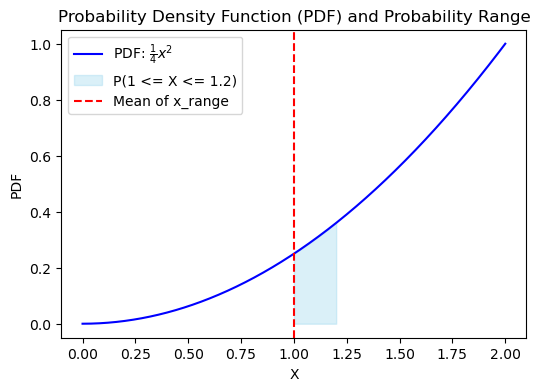

In [9]:
# Plot the PDF
plt.figure(figsize=(6, 4))

plt.plot(x_range, 
         pdf_function(x_range), 
         label='PDF: $\\frac{1}{4}x^2$', 
         color='blue')

plt.fill_between(probability_range, 
                 pdf_function(probability_range), 
                 color='skyblue', 
                 alpha=0.3, 
                 label='P(1 <= X <= 1.2)')

plt.axvline(x=x_range_mean, color='red', linestyle='--', label='Mean of x_range')

plt.title('Probability Density Function (PDF) and Probability Range')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()
plt.show()

- the blue curve represents the PDF $
f(x)=\frac{1}{4} x^2, \quad \text { for } 0 \leq x \leq 2
$ 

-  the shaded area corresponds to the probability $ \quad \text { for } 1 \leq x \leq 1.2$

In [10]:
# Calculate the probability P(1 <= X <= 1.2)
# Compute a definite integral.
# Integrate func from `a` to `b` (possibly infinite interval) using a
# technique from the Fortran library QUADPACK.

probability, _ = spi.quad(pdf_function, 1, 1.2)
print(f"Probability that X lies between 1 and 1.2: {probability:.4f}")

Probability that X lies between 1 and 1.2: 0.0607


The value 0.0607 indicates that, based on the given probability density function (PDF), approximately 6.07% of the total probability mass is concentrated within the range [1,1.2]


In [11]:
x_range_mean

1.0

In [12]:
spi.quad(pdf_function, 0.99999, 1.00000001)

(2.502475000081762e-06, 2.7783053636396125e-20)

In [13]:
spi.quad(pdf_function, 0.79999, 0.80000001)

(1.6015800001040916e-06, 1.778110991894723e-20)

In [14]:
spi.quad(pdf_function, 0.19999, 0.20000001)

(1.0009500008838073e-07, 1.1112777374797735e-21)

In [15]:
# Probability range
x_range            = np.linspace(0, 2, 1000)
probability_range  = np.linspace(1, 1.2, 1000)
probability_range1 = np.linspace(0.99999, 1.00000001, 1000)
probability_range2 = np.linspace(0.79999, 0.80000001, 1000)
probability_range3 = np.linspace(0.19999, 0.20000001, 1000)

# Mean of x_range
x_range_mean = np.mean(x_range)
x_range_mean

1.0

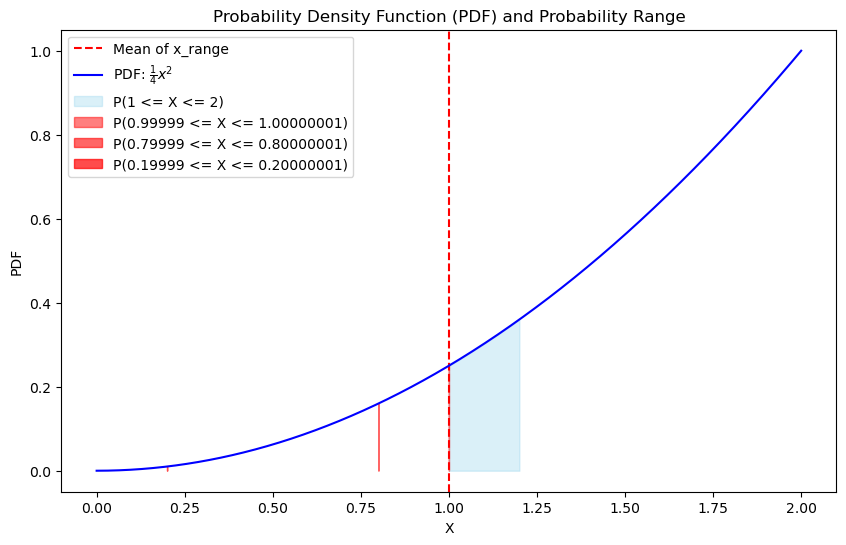

In [16]:
# Plot the PDF
plt.figure(figsize=(10, 6))

plt.axvline(x=x_range_mean, color='red', linestyle='--', label='Mean of x_range')

plt.plot(x_range, 
         pdf_function(x_range), 
         label='PDF: $\\frac{1}{4}x^2$', 
         color='blue')

plt.fill_between(probability_range, 
                 pdf_function(probability_range), 
                 color='skyblue', 
                 alpha=0.3, 
                 label='P(1 <= X <= 2)')

plt.fill_between(probability_range1, 
                 pdf_function(probability_range1), 
                 color='red', 
                 alpha=0.5, 
                 label='P(0.99999 <= X <= 1.00000001)') 

plt.fill_between(probability_range2, 
                 pdf_function(probability_range2), 
                 color='red', 
                 alpha=0.6, 
                 label='P(0.79999 <= X <= 0.80000001)')

plt.fill_between(probability_range3, 
                 pdf_function(probability_range3), 
                 color='red', 
                 alpha=0.7, 
                 label='P(0.19999 <= X <= 0.20000001)')



plt.title('Probability Density Function (PDF) and Probability Range')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()
plt.show()

**Around 1 (the mean):**

Result: $2.502475×10^{−6}$
 
Interpretation: The probability density around the mean of 1 is low within the extremely narrow interval [0.99999, 1.00000001]. While the density is small, it's not zero, indicating that there is some probability mass within this tiny range.

**Around 0.8:**

Result: $1.60158×10^{−6}$
 
Interpretation: Similarly, the probability density around 0.8 is low within the narrow interval [0.79999, 0.80000001]. The small value suggests a concentration of probability density around this point.

**Around 0.2:**

Result: $1.00095×10^{−7}$
 
Interpretation: The probability density around 0.2 is also low within the narrow interval [0.19999, 0.20000001]. The very small value indicates a concentration of probability density around this point.

**In summary**, 

- these results affirm that the probability density is highest around the mean (1) and decreases as you move away from the mean. 

- The small values obtained in these narrow intervals are consistent with the behavior of the given probability density function (PDF). 

- Keep in mind that the PDF is `not a direct probability` but represents the `likelihood` of the variable taking on a specific value within an infinitesimally small range.

In [17]:
spi.quad(pdf_function, 1.49999, 1.5000001)

(5.6812125039030244e-06, 6.307412929621475e-20)

In [18]:
spi.quad(pdf_function, 1.79999, 1.8000001)

(8.180955004683693e-06, 9.082684609622241e-20)

In [19]:
probability_range4 = np.linspace(1.49999, 1.5000001, 1000)
probability_range5 = np.linspace(1.79999, 1.8000001, 1000)

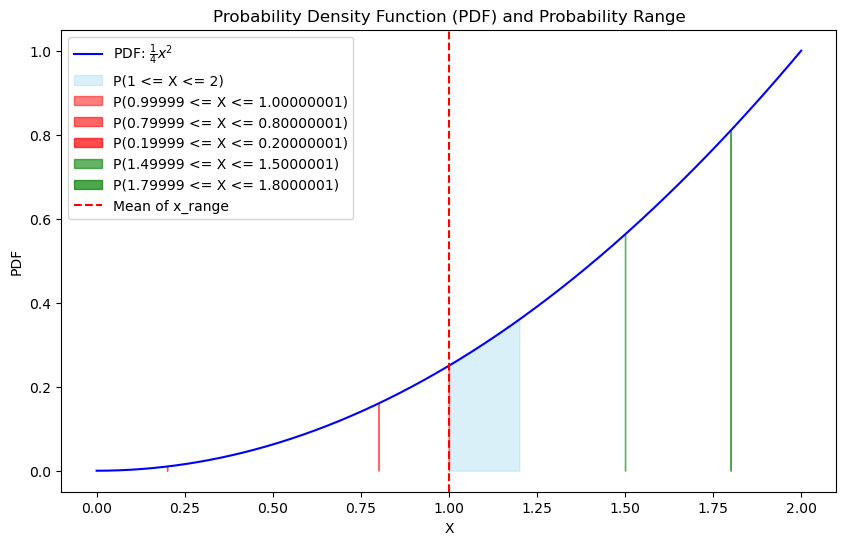

In [20]:
# Plot the PDF
plt.figure(figsize=(10, 6))

plt.plot(x_range, 
         pdf_function(x_range), 
         label='PDF: $\\frac{1}{4}x^2$', 
         color='blue')

plt.fill_between(probability_range, 
                 pdf_function(probability_range), 
                 color='skyblue', 
                 alpha=0.3, 
                 label='P(1 <= X <= 2)')

plt.fill_between(probability_range1, 
                 pdf_function(probability_range1), 
                 color='red', 
                 alpha=0.5, 
                 label='P(0.99999 <= X <= 1.00000001)') 

plt.fill_between(probability_range2, 
                 pdf_function(probability_range2), 
                 color='red', 
                 alpha=0.6, 
                 label='P(0.79999 <= X <= 0.80000001)')

plt.fill_between(probability_range3, 
                 pdf_function(probability_range3), 
                 color='red', 
                 alpha=0.7, 
                 label='P(0.19999 <= X <= 0.20000001)')

plt.fill_between(probability_range4, 
                 pdf_function(probability_range4), 
                 color='green', 
                 alpha=0.6, 
                 label='P(1.49999 <= X <= 1.5000001)')

plt.fill_between(probability_range5, 
                 pdf_function(probability_range5), 
                 color='green', 
                 alpha=0.7, 
                 label='P(1.79999 <= X <= 1.8000001)')

plt.axvline(x=x_range_mean, color='red', linestyle='--', label='Mean of x_range')

plt.title('Probability Density Function (PDF) and Probability Range')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()
plt.show()

**Around 1.5:**

Result: $5.6812125039030244×10^{−06}$
 
Interpretation: The probability density around 1.5 is relatively higher within the narrow interval [1.49999, 1.5000001] compared to the previous examples. This suggests a concentration of probability density around 1.5.

**Around 1.8:**

Result: $8.180955004683693×10^{−06}$
 
Interpretation: Similarly, the probability density around 1.8 is relatively higher within the narrow interval [1.79999, 1.8000001]. The larger value indicates a higher concentration of probability density around 1.8 compared to the previous examples.

**In summary**

In both cases, the probability density is still small, but it's larger than the values we obtained for intervals around 1, 0.8, and 0.2. 

This aligns with the general expectation that the probability density is highest around the mean (1) and decreases as you move away from it.

#### the mean is 1

but why the PDF for 1.5 will be more than .5 in this case?

- The mean (μ) is 1.
- For a symmetric distribution, the highest point of the PDF may indeed be close to the mean, but it's not a strict rule.

- the PDF around 1.5 is larger than around 1, it suggests that, in the given distribution, the likelihood of observing values around 1.5 is relatively higher compared to the likelihood of observing values around 1.

#### Example 3: CDF Calculation
Given the probability density function (PDF) for a continuous random variable X:
$$
f(x)=\frac{1}{4} x^2, \quad \text { for } 0 \leq x \leq 2
$$

Using the same PDF as in Exercise 1, calculate the Cumulative Distribution Function (CDF) for 

P(1≤X≤2).

In [21]:
# PDF function
def pdf_function(x):
    return 1/4 * x**2

In [22]:
# CDF function (integral of PDF)
def cdf_function(x):
    return spi.quad(pdf_function, 0, x)[0]

In [23]:
# Probability range
x_range    = np.linspace(0, 4, 1000)
cdf_values = [cdf_function(x) for x in x_range]

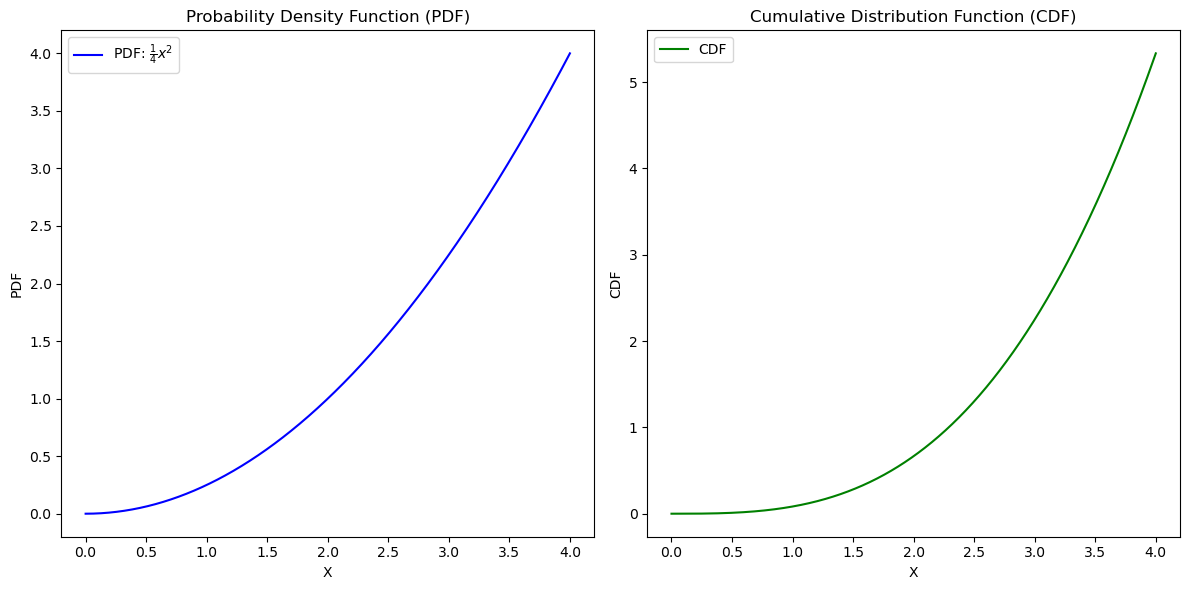

In [24]:
# Plot the PDF
plt.figure(figsize=(12, 6))

# Plot the PDF
plt.subplot(1, 2, 1)
plt.plot(x_range, pdf_function(x_range), label='PDF: $\\frac{1}{4}x^2$', color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()

# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(x_range, cdf_values, label='CDF', color='green')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('X')
plt.ylabel('CDF')
plt.legend()

plt.tight_layout()

PDF Plot:

Displays the Probability Density Function (PDF) for the given distribution.
The blue curve represents the PDF function 

CDF Plot:

Displays the Cumulative Distribution Function (CDF) calculated from the PDF.
The green curve represents the CDF, showing how the cumulative probability increases as x increases.

The CDF plot illustrates how the cumulative probability evolves across the range of x. It starts from 0 and approaches 1 as x increases. The steepness of the CDF curve indicates the rate at which probability accumulates.

#### Exercise 3: PDF to CDF Relationship

In [25]:
# Define a custom PDF function
def custom_pdf(x):
    return np.exp(-x)

In [26]:
# Define the range for x
x_range = np.linspace(0, 5, 1000)

In [27]:
# Calculate PDF values
pdf_values = custom_pdf(x_range)

In [28]:
# Calculate CDF values by integrating the PDF
cdf_values = [spi.quad(custom_pdf, 0, x)[0] for x in x_range]

In [29]:
# Find the point where the density is maximized
max_density_x = x_range[np.argmax(pdf_values)]

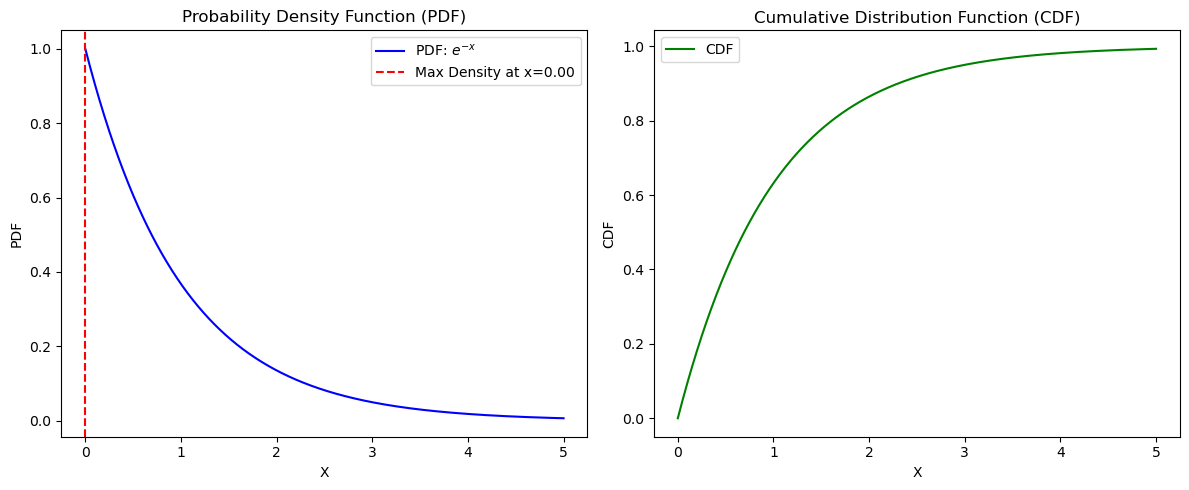

In [30]:
# Plot PDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_range, pdf_values, label='PDF: $e^{-x}$', color='blue')
plt.axvline(x=max_density_x, linestyle='--', color='red', label=f'Max Density at x={max_density_x:.2f}')
plt.title('Probability Density Function (PDF)')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x_range, cdf_values, label='CDF', color='green')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('X')
plt.ylabel('CDF')
plt.legend()

plt.tight_layout()

- The PDF is defined as $e^−x$

- The left plot shows the PDF, which represents the probability density at each point.
- The right plot shows the CDF, calculated by integrating the PDF up to each point. The CDF represents the cumulative probability up to that point.
- The relationship between the two functions is evident: the CDF is a continuous increasing function that starts from 0 and approaches 1, while the PDF represents the density of probability at each point.

- the density is higher for smaller values of x.

**densities are more for lower values of X but the probability is low !!**

- Density in Probability Distributions:
    - Represents the concentration or intensity of probability at a specific point in a continuous distribution.
    - In the context of the PDF, $f(x)$, higher density at a point x indicates a greater likelihood of the random variable X having values near x.

- Probability Calculation:
    - Probability is not solely determined by density but also by the width of the interval considered.
    - For continuous distributions, probability is calculated as the product of the density and the width of the interval.

- Exponential Distribution Example (PDF: $e^{−x}$ ):

    - As x increases in the exponential distribution, the density e −x  decreases rapidly.
    - Simultaneously, the width of the interval considered for higher x values also increases.
    - The overall probability is influenced by both the decreasing density and the increasing width of the interval.


#### Exercise 4: Finding Probabilities from CDF
- how to find probabilities from the Cumulative Distribution Function (CDF). 
- The CDF provides the cumulative probability up to a certain point, and finding probabilities involves analyzing the behavior of the CDF.

In [31]:
# Define a custom PDF function
def custom_pdf(x):
    return np.exp(-x)

In [32]:
# Define the range for x
x_range = np.linspace(0, 5, 1000)

In [33]:
# Define the range for x
x_range = np.linspace(0, 5, 1000)

In [34]:
# Calculate PDF values
pdf_values = custom_pdf(x_range)

In [35]:
# Calculate CDF values by integrating the PDF
cdf_values = [spi.quad(custom_pdf, 0, x)[0] for x in x_range]

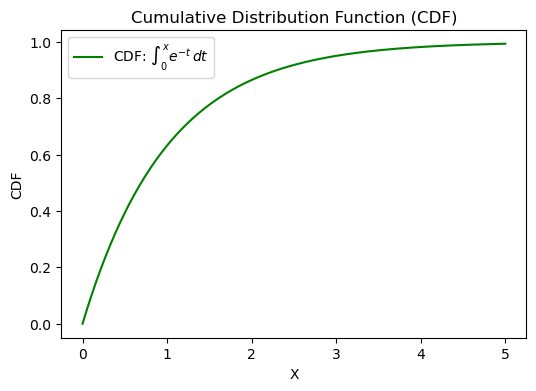

In [36]:
# Plot CDF
plt.figure(figsize=(6, 4))
plt.plot(x_range, cdf_values, label='CDF: $\int_{0}^{x} e^{-t} \,dt$', color='green')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('X')
plt.ylabel('CDF')
plt.legend()
plt.show()

Now, let's find the probability that X is less than or equal to a specific value $a$ by evaluating the CDF at $a$:

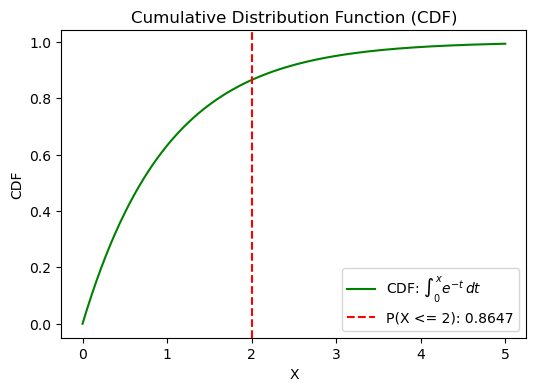

In [37]:
# Define the value 'a' for probability calculation
a = 2

# Calculate the probability P(X <= a) using the CDF
probability = spi.quad(custom_pdf, 0, a)[0]

# Plot CDF with a vertical line indicating the point 'a'
plt.figure(figsize=(6, 4))
plt.plot(x_range, cdf_values, label='CDF: $\int_{0}^{x} e^{-t} \,dt$', color='green')
plt.axvline(x=a, linestyle='--', color='red', label=f'P(X <= {a}): {probability:.4f}')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('X')
plt.ylabel('CDF')
plt.legend()
plt.show()

#### Exercise 5: Interpreting CDF Values

In [38]:
# Define a custom PDF function
def custom_pdf(x):
    return np.exp(-x)

In [39]:
# Define the range for x
x_range = np.linspace(0, 5, 1000)

# Calculate PDF values
pdf_values = custom_pdf(x_range)

# Calculate CDF values by integrating the PDF
cdf_values = [spi.quad(custom_pdf, 0, x)[0] for x in x_range]

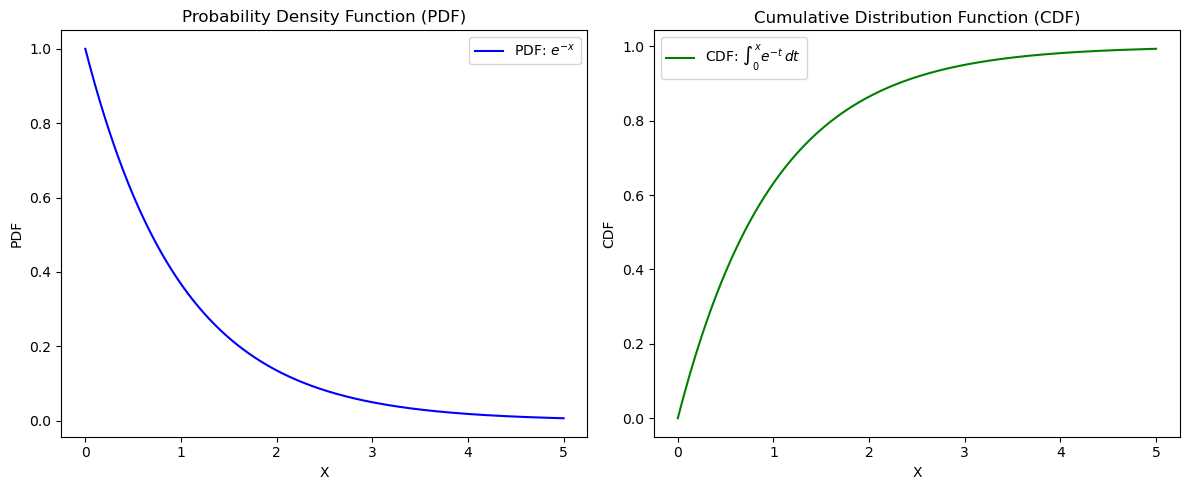

In [40]:
# Plot PDF and CDF
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_range, pdf_values, label='PDF: $e^{-x}$', color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, cdf_values, label='CDF: $\int_{0}^{x} e^{-t} \,dt$', color='green')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('X')
plt.ylabel('CDF')
plt.legend()

plt.tight_layout()
plt.show()

- Interpretation of CDF Values:

    - Point A (x=1):
        - CDF Value: P(X≤1)
        - Interpretation: The probability that X is less than or equal to 1.
    - Point B (x=2):
        - CDF Value: P(X≤2)
        - Interpretation: The probability that X is less than or equal to 2.
    - Point C (x=3):
        - CDF Value: P(X≤3)
        - Interpretation: The probability that X is less than or equal to 3.
        
- Summary:

    - CDF values at specific points represent the cumulative probabilities up to those points.
    - As x increases, the CDF values increase, indicating the accumulation of probability.
    - The CDF provides insights into the probability distribution, showing how likely it is for X to be less than or equal to different values.

---------------------------------------------------
#### probability density function (pdf)
- uniform distribution

In [77]:
# Uniform Distribution
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

In [10]:
# Data points
x_uniform = np.linspace(50, 450, 1000)  # Extend the range for better visualization

In [11]:
# Marked points
x1_uniform, x2_uniform = 150, 350

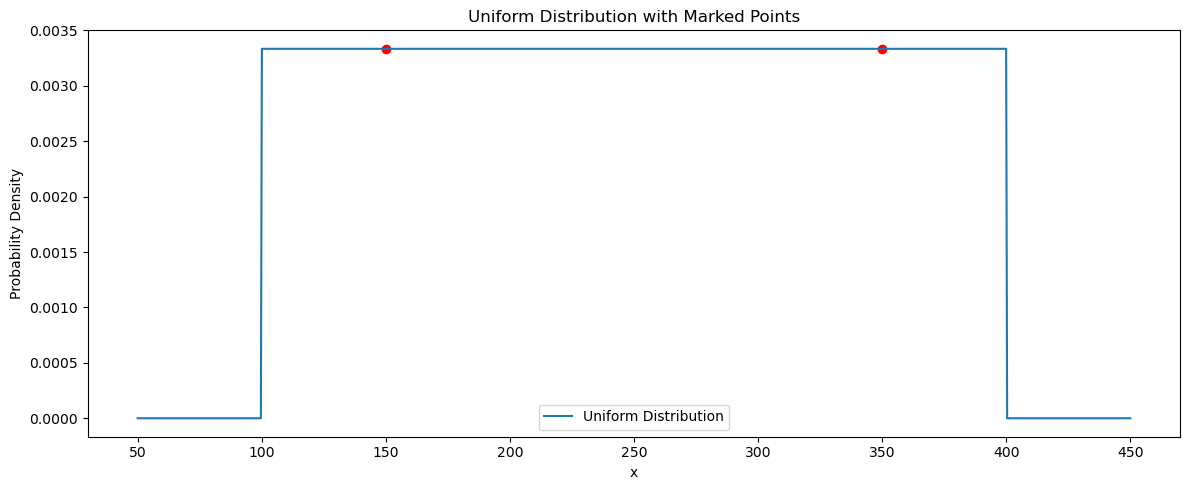

In [15]:
# Plotting
plt.figure(figsize=(12, 5))

# Uniform Distribution
plt.plot(x_uniform, uniform_pdf(x_uniform, 100, 400), label='Uniform Distribution')
plt.scatter([x1_uniform, x2_uniform], [uniform_pdf(x1_uniform, 100, 400), uniform_pdf(x2_uniform, 100, 400)], color='red')
plt.title('Uniform Distribution with Marked Points')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()

In [17]:
# Calculate pdf values at marked points
pdf_x1 = uniform_pdf(x1_uniform, 100, 400)
pdf_x2 = uniform_pdf(x2_uniform, 100, 400)

# Print pdf values for the marked points
print(f'pdf value at x1 ({x1_uniform}): {pdf_x1}')
print(f'pdf value at x2 ({x2_uniform}): {pdf_x2}')

pdf value at x1 (150): 0.0033333333333333335
pdf value at x2 (350): 0.0033333333333333335


In [18]:
# Normal Distribution
def normal_pdf(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2))


In [19]:
# Data points
x_normal = np.linspace(0, 400, 1000)

In [20]:
# Marked points
x1_normal, x2_normal = 150, 350

In [21]:
# Calculate pdf values at marked points
pdf_x1 = normal_pdf(x1_normal, 200, 50)
pdf_x2 = normal_pdf(x2_normal, 200, 50)

pdf value at x1 (150): 0.004839414490382867
pdf value at x2 (350): 8.863696823876013e-05


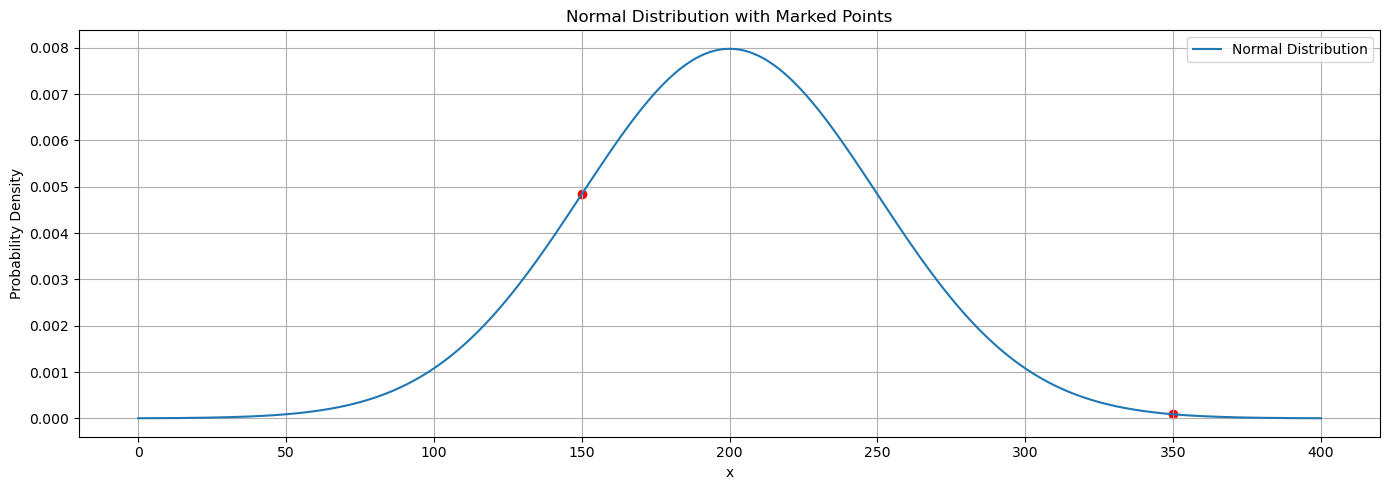

In [24]:
# Plotting
plt.figure(figsize=(14, 5))

# Normal Distribution
plt.plot(x_normal, normal_pdf(x_normal, 200, 50), label='Normal Distribution')
plt.scatter([x1_normal, x2_normal], [pdf_x1, pdf_x2], color='red')
plt.title('Normal Distribution with Marked Points')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

# Print pdf values for the marked points
print(f'pdf value at x1 ({x1_normal}): {pdf_x1}')
print(f'pdf value at x2 ({x2_normal}): {pdf_x2}')
plt.grid()
plt.tight_layout()

#### Example 03

In [34]:
# Given dataset X
X = [12.5, 34.2, 8.9, 56.7, 23.1, 45.6, 78.3, 9.8, 65.4, 32.0, 14.7, 88.2, 41.3, 27.6, 53.9, 19.4, 72.1, 5.3, 38.8, 61.0, 16.5, 94.7, 30.2, 83.6, 49.1, 2.7, 67.8, 43.0, 76.4, 10.2]

In [35]:
# Calculate mean and standard deviation
mean_X    = np.mean(X)
std_dev_X = np.std(X)

In [41]:
# Calculate PDF for specific points
pdf_20_2 = (1 / (std_dev_X * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((20.2 - mean_X) / std_dev_X)**2)
pdf_30_2 = (1 / (std_dev_X * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((30.2 - mean_X) / std_dev_X)**2)
pdf_60_2 = (1 / (std_dev_X * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((60.2 - mean_X) / std_dev_X)**2)


In [42]:
# Print PDF values for specific points
print(f"PDF(20.2) = {pdf_20_2:.4f}")
print(f"PDF(30.2) = {pdf_30_2:.4f}")
print(f"PDF(60.2) = {pdf_60_2:.4f}")

PDF(20.2) = 0.0106
PDF(30.2) = 0.0134
PDF(60.2) = 0.0118


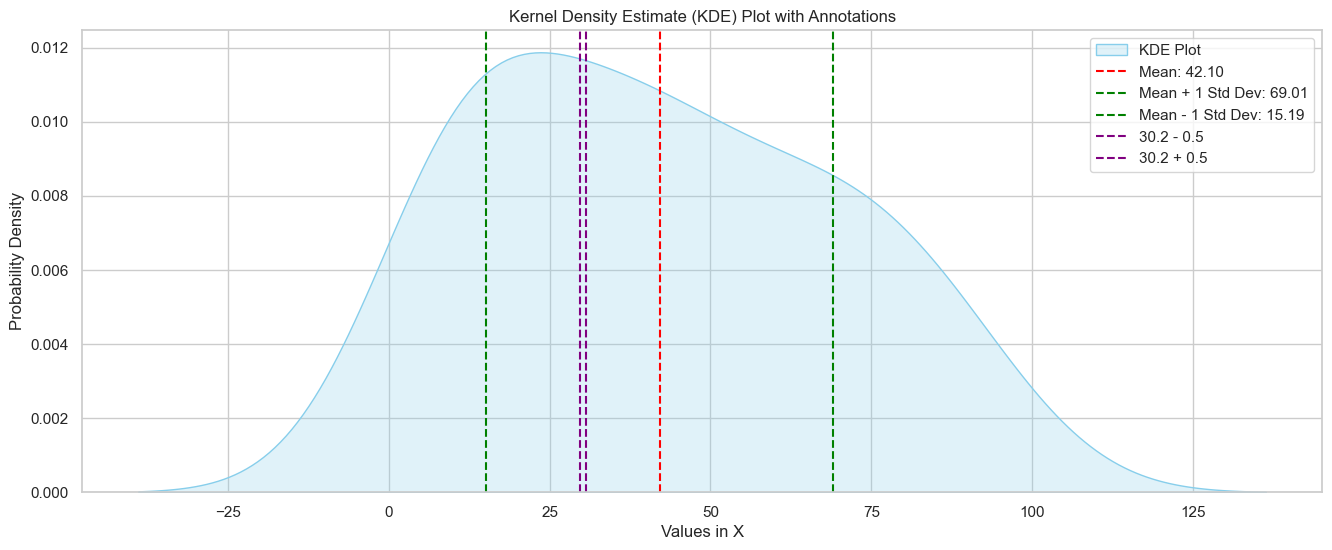

In [45]:
# Plot KDE plot
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
sns.kdeplot(X, shade=True, color="skyblue", label="KDE Plot")

# Annotate mean and std dev
plt.axvline(mean_X, color="red", linestyle="--", label=f"Mean: {mean_X:.2f}")
plt.axvline(mean_X + std_dev_X, color="green", linestyle="--", label=f"Mean + 1 Std Dev: {mean_X + std_dev_X:.2f}")
plt.axvline(mean_X - std_dev_X, color="green", linestyle="--", label=f"Mean - 1 Std Dev: {mean_X - std_dev_X:.2f}")

# Draw vertical lines at 30.2 - 0.5 and 30.2 + 0.5
plt.axvline(30.2 - 0.5, color="purple", linestyle="--", label="30.2 - 0.5")
plt.axvline(30.2 + 0.5, color="purple", linestyle="--", label="30.2 + 0.5")

# Set plot details
plt.title("Kernel Density Estimate (KDE) Plot with Annotations")
plt.xlabel("Values in X")
plt.ylabel("Probability Density")
plt.legend();

#### Example with a dataset

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [86]:
ca_housing_df = pd.read_csv(r'D:\AI-DATASETS\01-MISC\CA_housing.csv')

In [87]:
ca_housing_df.shape

(20640, 10)

In [88]:
ca_housing_df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2880,-118.97,35.38,35,1673,426.0,1041,413,1.3750,INLAND,57500
13942,-117.17,34.28,13,4867,718.0,780,250,7.1997,INLAND,253800
14788,-117.13,32.58,32,1870,437.0,1142,426,2.3194,NEAR OCEAN,159400
6532,-118.08,34.07,32,4089,975.0,3775,955,3.2900,<1H OCEAN,205500
6324,-117.99,33.98,18,8399,1144.0,3727,1107,6.9695,<1H OCEAN,360400


In [89]:
# Consider 'median_house_value' for this example
median_house_value = ca_housing_df['median_house_value']

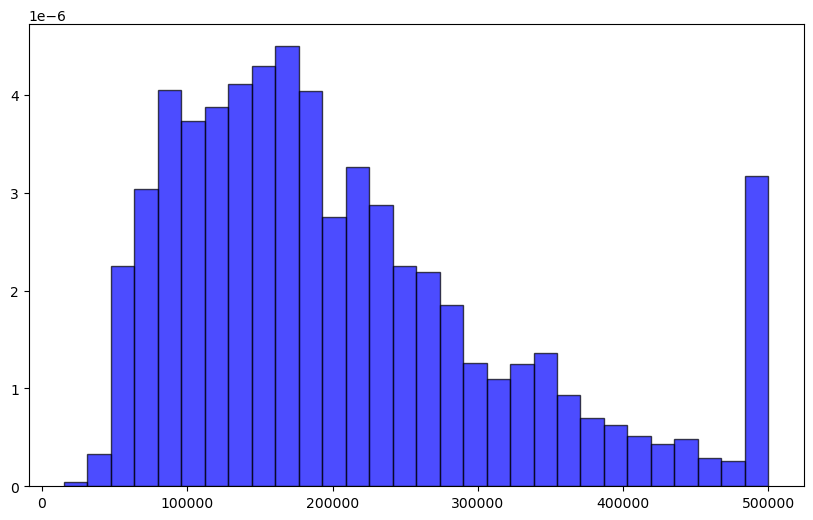

In [91]:
# Plot histogram for visualizing the distribution
plt.figure(figsize=(10, 6))
plt.hist(median_house_value, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.show()

In [92]:
# Calculate mean and standard deviation
mu    = np.mean(median_house_value)
sigma = np.std(median_house_value)

In [93]:
# Create a range of values for the x-axis
x_values = np.linspace(min(median_house_value), max(median_house_value), 1000)


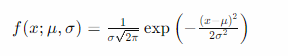

In [95]:
# Calculate the PDF using the manual formula for a normal distribution
pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x_values - mu)**2 / (2 * sigma**2))

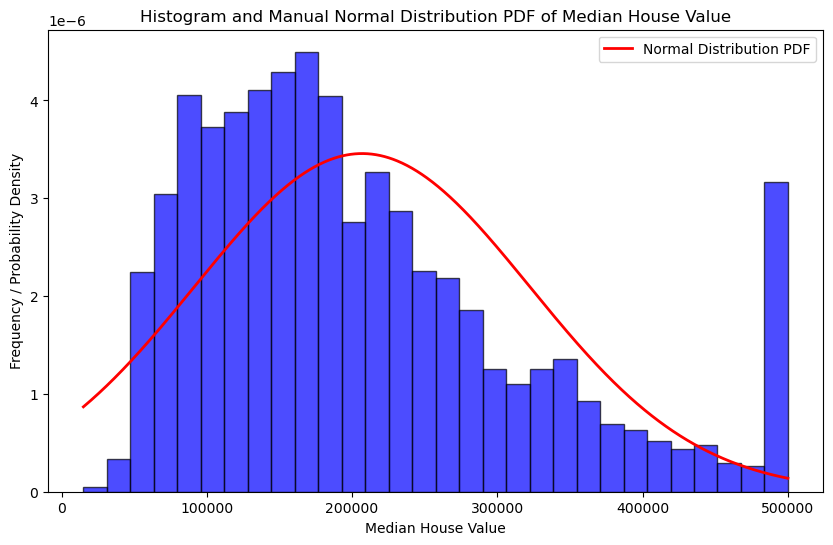

In [97]:
# Plot histogram and PDF
plt.figure(figsize=(10, 6))
plt.hist(median_house_value, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.plot(x_values, pdf_values, 'r-', linewidth=2, label='Normal Distribution PDF')
plt.title('Histogram and Manual Normal Distribution PDF of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency / Probability Density')
plt.legend()
plt.show()

In [98]:
def custom_normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))


In [99]:
# Assuming 'ca_housing_df' is your DataFrame
median_house_value = ca_housing_df['median_house_value']

In [100]:
# Fit a normal distribution to the data
mu, std = np.mean(median_house_value), np.std(median_house_value)

In [101]:
# Generate x values for the plot
x_values = np.linspace(min(median_house_value), max(median_house_value), 1000)

In [102]:
# Calculate PDF and CDF values
pdf_values = custom_normal_pdf(x_values, mu, std)
cdf_values = np.cumsum(pdf_values) * (x_values[1] - x_values[0])  # integrate PDF to get CDF

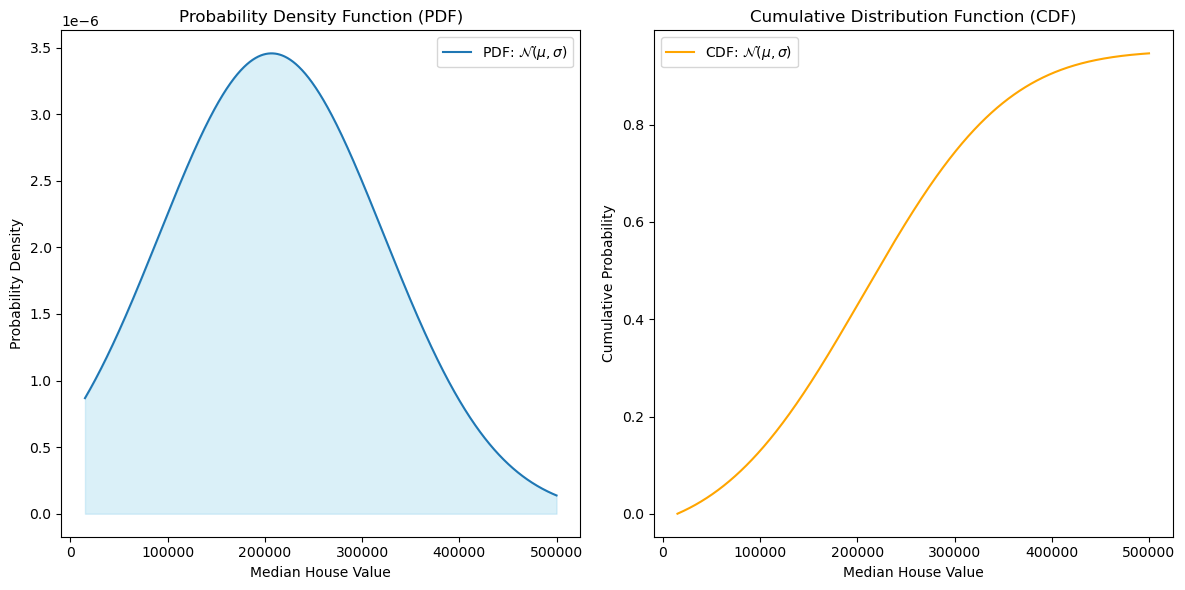

In [103]:
# Plot PDF regions and CDF lines
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, label='PDF: $\mathcal{N}(\mu, \sigma)$')
plt.fill_between(x_values, pdf_values, color='skyblue', alpha=0.3)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Median House Value')
plt.ylabel('Probability Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, label='CDF: $\mathcal{N}(\mu, \sigma)$', color='orange')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Median House Value')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

In [106]:
from scipy.integrate import quad

In [107]:
# Define the cumulative probability function
def cumulative_probability(x):
    result, _ = quad(custom_normal_pdf, min(median_house_value), x, args=(mu, std))
    return result

In [112]:
# Calculate cumulative probabilities for the specified thresholds
threshold_1 = 300000
probability_below_threshold_1 = cumulative_probability(threshold_1)
probability_below_threshold_1

0.7420299423423815

In [114]:
threshold_2 = 500000
probability_above_threshold_2 = cumulative_probability(threshold_2)
probability_above_threshold_2

0.9462715737966545

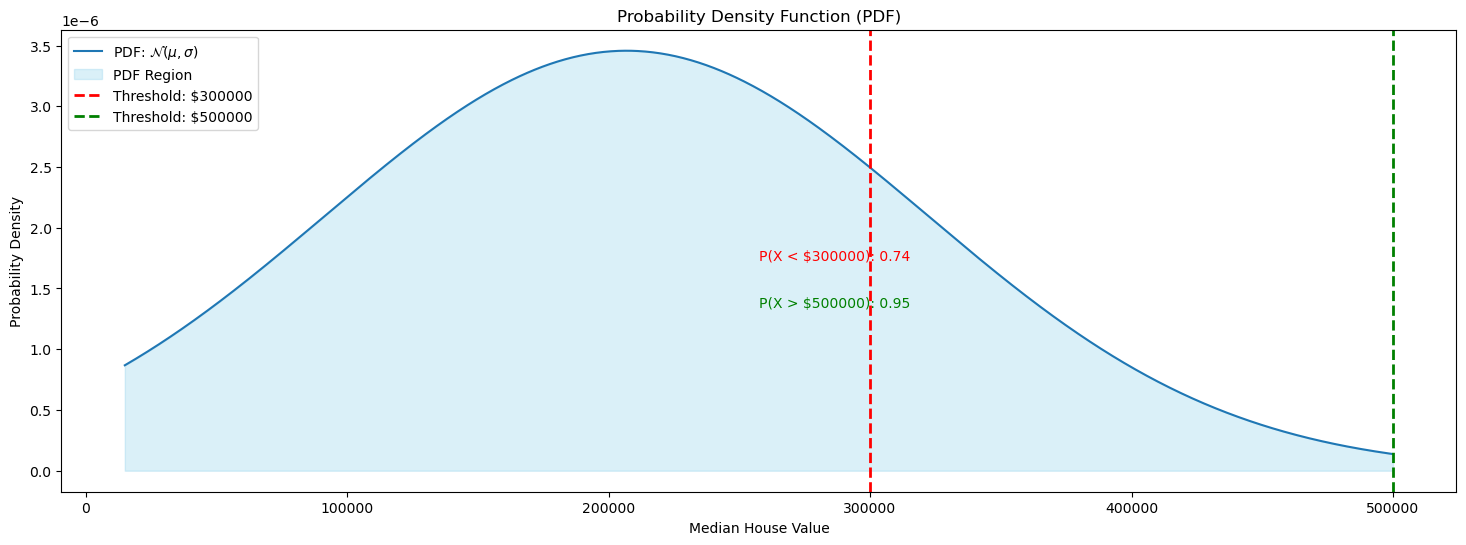

In [116]:
# Plot PDF and mark regions for the specified probabilities
plt.figure(figsize=(18, 6))

plt.plot(x_values, pdf_values, label='PDF: $\mathcal{N}(\mu, \sigma)$')
plt.fill_between(x_values, pdf_values, color='skyblue', alpha=0.3, label='PDF Region')

plt.axvline(threshold_1, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: ${threshold_1}')
plt.axvline(threshold_2, color='green', linestyle='dashed', linewidth=2, label=f'Threshold: ${threshold_2}')

plt.title('Probability Density Function (PDF)')
plt.xlabel('Median House Value')
plt.ylabel('Probability Density')
plt.legend()

plt.text(0.5, 0.5, f'P(X < ${threshold_1}): {probability_below_threshold_1:.2f}', transform=plt.gca().transAxes, color='red')
plt.text(0.5, 0.4, f'P(X > ${threshold_2}): {probability_above_threshold_2:.2f}', transform=plt.gca().transAxes, color='green')

plt.show()

In the context of our data, this indicates that about 74% of the median house values are less than $300,000.

In [117]:
ca_housing_df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64